Тестирование сверточного вариационного автоэнкодера без дополнительного входа номера классаавтокодировщика для восстановления картинок букв.

Возьмите из ноутбука по практическому занятия "Автокодировщики" сверточный вариационный энкодер или напишите свой и обучите его на датасете Emnist letters. 

Датасет содержит изображения рукописных латинских букв. 

Размер обучающей выборки 697932 изображений, тестовой - 116323. 


Данный автокодировщик показывает весьма слабые результаты. При воспроизведении букв много "брака". Повысьте качество его работы. Обратите внимание на следущие гиперпараметры:
1. Размерность скрытого пространства
2. Количество сверточных слоев
3. Число эпох обучения

Добейтесь существенного улучшения качество воспроизведения букв. 

В выводах укажите минимальные значения подбираемых параметров, при которых удается получить желаемое качество воспроизведения символов (пример ниже).

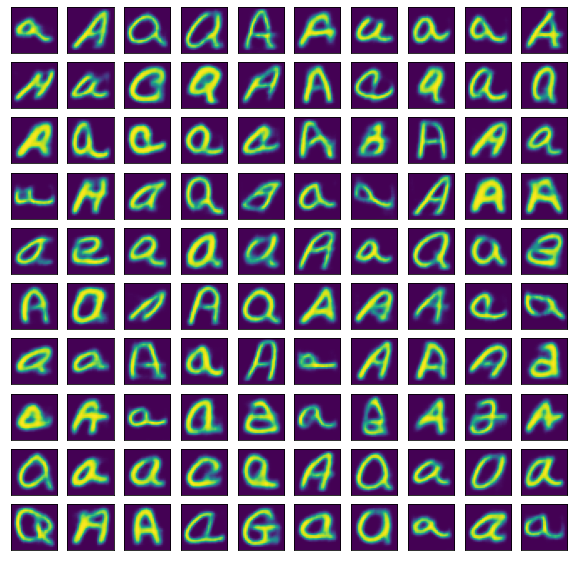

In [ ]:
!pip install emnist

In [ ]:
# Подключим Numpy
import numpy as np

# Подключим библиотеку отображения графиков
import matplotlib.pyplot as plt

# Импортируем Keras
from tensorflow import keras

import tensorflow as tf

# Подключим все необходимые слои Keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Lambda, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Dropout, concatenate, Conv2D, Conv2DTranspose,MaxPooling2D

# Подключим модуль вычислений на Keras
import keras.backend as K

# Подключим датасет рукописных букв
from emnist import extract_training_samples, extract_test_samples  

# Подключим модуль работы с операционной системой
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # От tensorflow будет получать только ошибки

In [ ]:
# Скачаем обучающую выборку
xs_train, y_train = extract_training_samples('letters')

# Скачаем тестовую выборку
xs_test, y_test = extract_test_samples('letters')

# Добавим 1 размерность numpy-массиву обучающей выборки + приведем к диапазону 0...1
x_train = np.reshape(xs_train, (len(xs_train), 28, 28, 1))/255. 

# Добавим 1 размерность numpy-массиву тестовой выборки + приведем к диапазону 0...1
x_test = np.reshape(xs_test, (len(xs_test), 28, 28, 1))/255. 

In [ ]:
# Определим функцию отображения 100 картинок

def showResult(re): # Получим 100 картинок
    
    total = 10                               # Считаем полное количесво выводимых мультяшек +1
    plt.figure(figsize=(total, total))       # Создаем заготовку для финальной картинки 10x10
    num = 1                                  # Счетчик выводимых мультяшек
    for i in range(100):                     # Цикл по картинкам
        ax = plt.subplot(total, total, num)  # Добавим место для графика
        img = re[num-1:num,:,:,:]            # Сформируем очередную картинку
        num += 1                             # Инкремент номера графика        
        plt.imshow(img.squeeze())            # Рисуем пмультяшек
        ax.get_xaxis().set_visible(False)    # Спрячем ось X
        ax.get_yaxis().set_visible(False)    # Спрячем ось Y

In [ ]:
print (x_train.shape) # Выведем размерность обучающей выборки изображений
print (x_test.shape)  # Выведем размерность тестовой выборки изображений
print (y_train.shape) # Выведем размерность обучающей выборки меток
print (y_test.shape)  # Выведем размерность тестовой выборки меток

(124800, 28, 28, 1)
(20800, 28, 28, 1)
(124800,)
(20800,)


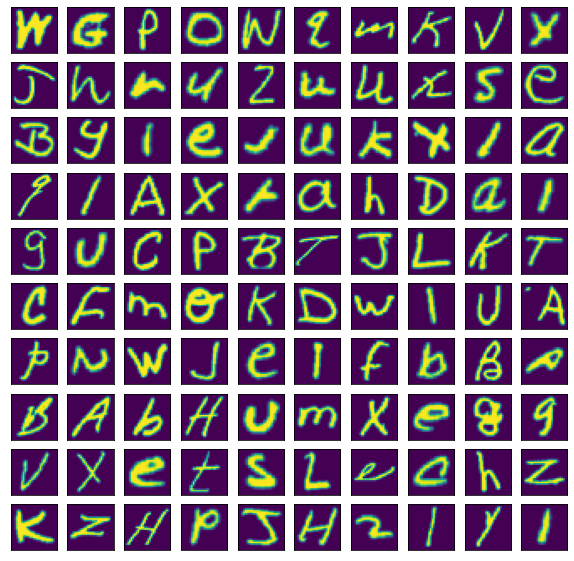

In [ ]:
# Взглянем на первые 100 изображений обучающей выборки

showResult(x_train[:100,:,:,:])

In [ ]:
# Взглянем на первые 100 меток обучающей выборки

y_train[:100]

array([23,  7, 16, 15, 23, 17, 13, 11, 22, 24, 10, 14, 18, 21, 26, 21, 21,
       24, 19,  5,  2, 25,  9,  5, 10, 21, 11, 24, 12,  1, 17,  9,  1, 24,
       18,  1,  8,  4,  1,  9,  7, 21,  3, 16,  2, 20, 10, 12, 11, 20,  3,
        6, 13, 15, 11,  4, 23, 12, 21,  1, 16, 14, 23, 10,  5, 12,  6,  2,
        2,  1,  2,  1,  2,  8, 21, 13, 24,  5,  7,  7, 22, 24,  5, 20, 19,
       12,  5,  3,  8, 26, 11, 26,  8, 16, 10,  8, 26, 12, 25,  9],
      dtype=uint8)

In [ ]:
# Ваше решение

In [ ]:
batch_size = 128 # Задамим размер батча для обучения AE

In [ ]:
# Создадим сверточный энкодер
input_img = Input(shape=(28, 28, 1))                     # Добавим входной слой
x = Conv2D(32,3, strides=1,padding='valid',activation='relu')(input_img)
print(x.shape)
x = Conv2D(32,3, strides=1,padding='valid',activation='relu')(x)
print(x.shape)
x = MaxPooling2D()(x)
print(x.shape)
x = Conv2D(64,3, strides=1,padding='valid',activation='relu')(x)
print(x.shape)
x = BatchNormalization()(x)                                                          # Добавим нормализацию по батчу
x = Conv2D(64,3, strides=1,padding='valid',activation='relu')(x)
print(x.shape)
#x = MaxPooling2D()(x)
#print(x.shape)
#x = Conv2D(128,3, strides=1,padding='valid',activation='relu')(x)
#print(x.shape)
x = MaxPooling2D()(x)
print(x.shape)
x = Conv2D(2,3, strides=1,padding='same',activation='relu')(x)
print(x.shape)
x = BatchNormalization()(x)                                                          # Добавим нормализацию по батчу
pre_flatten_shape=x.shape[1:]
print(pre_flatten_shape)
x =Flatten()(x)                                    # Добавим Flatten
print(x.shape)
Enc_shape=x.shape[1]
hidden_dim=Enc_shape
print(hidden_dim)
#x = Dense(2, activation='linear')(flatten)               # Добавим выходной dense слой

(None, 26, 26, 32)
(None, 24, 24, 32)
(None, 12, 12, 32)
(None, 10, 10, 64)
(None, 8, 8, 64)
(None, 4, 4, 64)
(None, 4, 4, 2)
(4, 4, 2)
(None, 32)
32


In [ ]:
z_mean = Dense(hidden_dim)(x)        # Добавим dense для получения мат.ожидания
z_log_var = Dense(hidden_dim)(x)     # Добавим dense для получения логарифма дисперсии

In [ ]:
# Создадим функцию - генератор случайных чисел с заданными параметрами

def noiser(args):                                                          # Входные параметры
  z_mean, z_log_var = args                                                 # Разберем входные параметры на отдельные переменные
  N = K.random_normal(shape=(K.shape(z_mean)[0], hidden_dim), mean=0., stddev=0.3) # Генерируем тензор из нормальных случайных  чисел с параметрами (0,1)

  # Вернем тензор случайных числел с заданной дисперсией и мат.ожиданием
  return K.exp(z_log_var / 2) * N + z_mean                                 

h = Lambda(noiser, output_shape=(hidden_dim,))([z_mean, z_log_var])        # Создадим свой слой - лямбда. На входе мат.ожидание и логарифм дисперсии 
                                                                           # На выходе - тензор случайных чисел 

In [ ]:
 # Соберем энкодер

encoderVAEС = keras.Model(input_img, [z_mean, z_log_var, h], name='encoder')

In [ ]:
# Создадим сверточный декодер

input_enc = Input(shape=Enc_shape)                            # Добавим входной слой
print(input_enc.shape)
d = Reshape(pre_flatten_shape)(input_enc)                               # Решейпим 1D тензор в 3D тензор
print(d.shape)
d = Conv2DTranspose(64, kernel_size=3, strides= 1,padding='same',activation='relu')(d)
print(d.shape)
#d = Conv2DTranspose(64, kernel_size=3, strides= 2,padding='same',activation='relu')(d)
#print(d.shape)
#d = Conv2DTranspose(64, kernel_size=3, strides= 1,padding='valid',activation='relu')(d)
#print(d.shape)
d = Conv2DTranspose(64, kernel_size=3, strides= 2,padding='same',activation='relu')(d)
print(d.shape)
d = Conv2DTranspose(64, kernel_size=3, strides= 1,padding='valid',activation='relu')(d)
x = BatchNormalization()(x)                                                          # Добавим нормализацию по батчу
print(d.shape)
d = Conv2DTranspose(64, kernel_size=3, strides= 1,padding='valid',activation='relu')(d)
print(d.shape)
d = Conv2DTranspose(32, kernel_size=3, strides= 2,padding='same',activation='relu')(d)
print(d.shape)
d = Conv2DTranspose(32, kernel_size=3, strides= 1,padding='valid',activation='relu')(d)
x = BatchNormalization()(x)                                                          # Добавим нормализацию по батчу
print(d.shape)
decoded = Conv2DTranspose(1, kernel_size=3, strides= 1,padding='valid',activation='relu')(d)
#print(d.shape)
#decoded = Conv2DTranspose(1, kernel_size=3, strides= 1,padding='same',activation='sigmoid')(d)
print(decoded.shape)

(None, 32)
(None, 4, 4, 2)
(None, 4, 4, 64)
(None, 8, 8, 64)
(None, 10, 10, 64)
(None, 12, 12, 64)
(None, 24, 24, 32)
(None, 26, 26, 32)
(None, 28, 28, 1)


In [ ]:
# Соберем декодер

decoderVAEС = keras.Model(input_enc, decoded, name='decoder')  

In [ ]:
# Запишем выражение для декодера, заметим, что за вход декодера подается только 1 их выходов энкодера

outputs = decoderVAEС(encoderVAEС(input_img)[2]) 

In [ ]:
# Соберем наши сетки

vaec = keras.Model(input_img, decoderVAEС(encoderVAEС(input_img)[2])) # Соберем VAE

In [ ]:
vaec.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        [(None, 32),              68522     
                              (None, 32),                        
                              (None, 32)]                        
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         140001    
                                                                 
Total params: 208,523
Trainable params: 208,391
Non-trainable params: 132
_________________________________________________________________


In [ ]:
reconstruction_loss = keras.losses.MSE(input_img, outputs)     # Рассчитаем ошибку восстановления изображения - лоссы MSE
reconstruction_loss *= 28*28                                   # Уберем нормировку MSE
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)  # Рассчитаем лоссы KL
kl_loss = -0.5* K.sum(kl_loss, axis=-1)                        #  
vaeс_loss = K.mean(reconstruction_loss) +  K.mean(kl_loss)      # Суммируем лоссы - здесь можно вводить веса  
vaec.add_loss(vaeс_loss)                                         # Отдадим наш лосс VAE

In [ ]:
# Выведем состав энкодера
encoderVAEС.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 24, 24, 32)   9248        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 12, 12, 32)   0           ['conv2d_1[0][0]']               
                                                                                            

In [ ]:
#  Выведем состав энкодера
decoderVAEС.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 2)           0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 4, 4, 64)         1216      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 8, 8, 64)         36928     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 10, 10, 64)       36928     
 ranspose)                                                       
                                                           

In [ ]:
# Компилируем VAE

vaec.compile(optimizer='adam') # оптимайзер ADAM

In [ ]:
vaec.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 encoder (Functional)           [(None, 32),         68522       ['input_1[0][0]',                
                                 (None, 32),                      'input_1[0][0]']                
                                 (None, 32)]                                                      
                                                                                                  
 decoder (Functional)           (None, 28, 28, 1)    140001      ['encoder[0][2]',                
                                                                  'encoder[1][2]']            

In [ ]:
# Запускаем обучениe

vaec.fit(x_train,      # Обучающая выборка
        x_train,       # "Labels" обучающей выборки
        epochs=10,      # 10 эпох
        batch_size=128, # размер батча
        shuffle=True)  # обучающую выборку перемешиваем

Epoch 1/10
975/975 [==============================] - 73s 62ms/step - loss: 38.5822
Epoch 2/10
975/975 [==============================] - 60s 62ms/step - loss: 27.3211
Epoch 3/10
975/975 [==============================] - 58s 60ms/step - loss: 24.9194
Epoch 4/10
975/975 [==============================] - 58s 59ms/step - loss: 23.7132
Epoch 5/10
975/975 [==============================] - 57s 59ms/step - loss: 22.9050
Epoch 6/10
975/975 [==============================] - 58s 59ms/step - loss: 22.3047
Epoch 7/10
975/975 [==============================] - 58s 59ms/step - loss: 21.8505
Epoch 8/10
975/975 [==============================] - 58s 59ms/step - loss: 21.4921
Epoch 9/10
975/975 [==============================] - 58s 59ms/step - loss: 21.2319
Epoch 10/10
975/975 [==============================] - 60s 62ms/step - loss: 21.0035


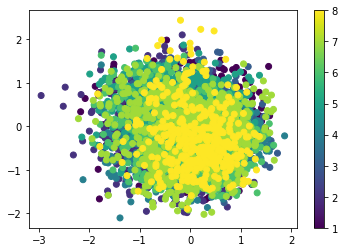

In [ ]:
h = encoderVAEС.predict(x_test[:6000], batch_size=batch_size)    # Предиктим энкодером первые 6000 цизображений ифр 
plt.scatter(h[2][:, 0], h[2][:, 1] , c=y_test[:6000], cmap='viridis') # Выводим  скаттер координат точек скрытого пространства
plt.colorbar()                                                  # Выводим цветовую шкалу - каждому классу свой цвет
plt.show()                                                      # Отрисуем картинку

Проверка очистки и восстановления.

In [ ]:
# Определим функцию отображения массива
def showArray(ArrayX): # Получим обученный декодер
    n = 10                                                              
    plt.figure(figsize=(n, n))                                # Создаем заготовку для финальной картинки 
    cnt=0
    for i in range(0, n):                                          # Цикл по горизонтали пространства Z
     for j in range(0,n):                                         # Цикл по вертикали пространства Z
        ax = plt.subplot(n, n, cnt+1)                           # Добавим место для графика
        img = ArrayX[cnt]
        cnt += 1                                                      # Инкремент номера графика
        plt.imshow(img.squeeze(), cmap='gray')
        ax.get_xaxis().set_visible(False)                             # Спрячем ось X
        ax.get_yaxis().set_visible(False)                             # Спрячем ось Y

In [ ]:
import random
RandomIndex=np.array(range(x_test.shape[0]))
random.shuffle(RandomIndex)

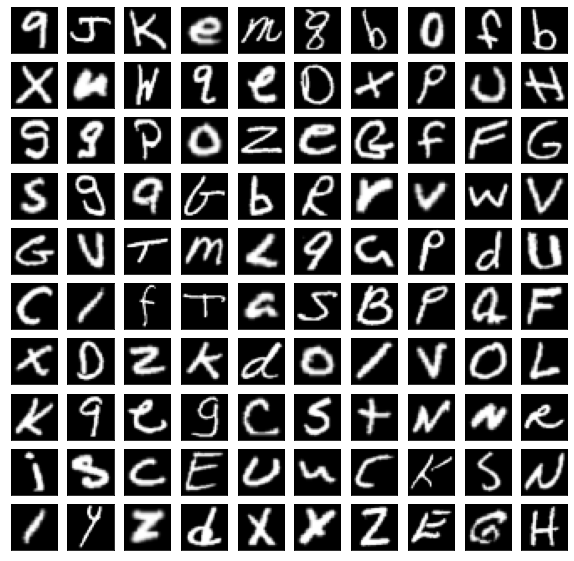

In [ ]:
showArray(x_test[RandomIndex][:100,:,:,:])

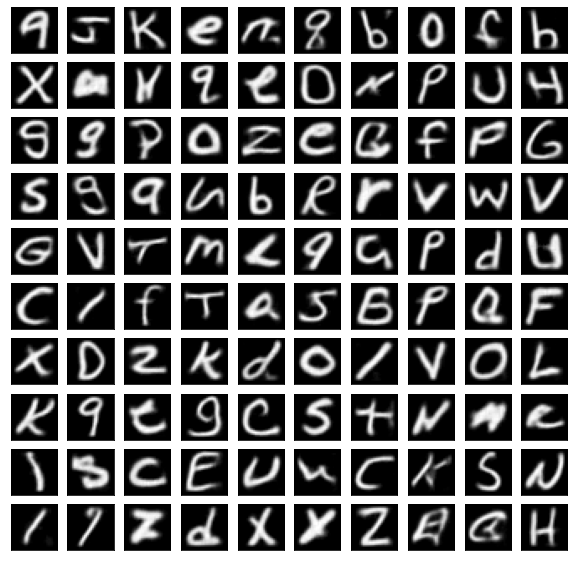

In [ ]:
 showArray(vaec.predict(x_test[RandomIndex][:100]))

Генерация, 3 измерения меняем, остальны 0

In [ ]:
# Определим функцию отображения результатов работы декодера

def showResult(decoder): # Получим обученный декодер

    n = 2                                                               
    total = 2*n+1                                                     # Считаем полное количесво выводимых цифр +1
    plt.figure(figsize=(int(pow(total,3/2)+1), int(pow(total,3/2)+1)))                                # Создаем заготовку для финальной картинки 
    num = 1                                                           # Счетчик выводимых цифр
    for i in range(-n, n+1):                                          # Цикл по горизонтали пространства Z
     for j in range(-n, n+1):                                         # Цикл по вертикали пространства Z
      for k in range(-n, n+1):                                         # Цикл по вертикали пространства Z
        ax = plt.subplot(int(pow(total,3/2)+1), int(pow(total,3/2)+1), num)                           # Добавим место для графика
        num += 1                                                      # Инкремент номера графика
        img = decoder.predict(np.expand_dims([2*i/n, 2*j/n, 2*k/n, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], axis=0)) # Выполним предикт изображения цифры по точкам из Z области
        plt.imshow(img.squeeze(), cmap='gray')                        # Рисуем предсказанную цифру
        ax.get_xaxis().set_visible(False)                             # Спрячем ось X
        ax.get_yaxis().set_visible(False)                             # Спрячем ось Y

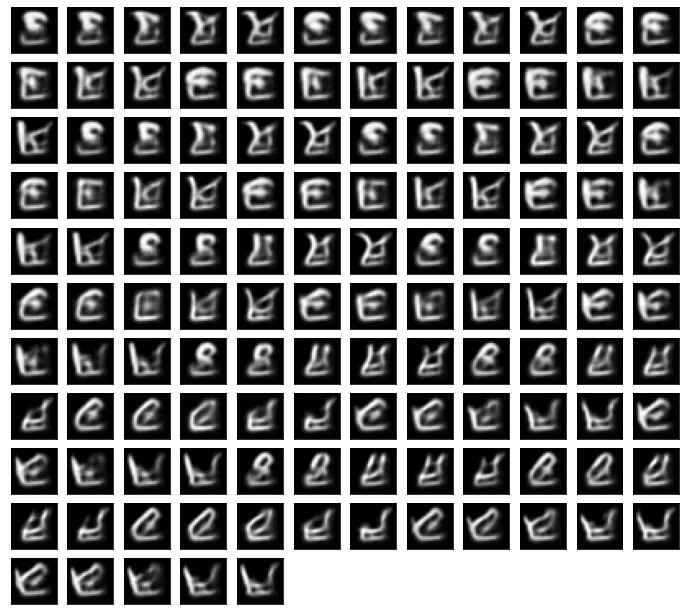

In [ ]:
showResult(decoderVAEС)

При скрытом пространстве размером 32, восстанавливает хорошо. Генерация вероятно тоже хорошая, но надо верно подобрать диапазоны значений для измерений.